<h1><center>CMPE 462 - Project 1<br>Binary Classification with Logistic Regression<br>Due: April 23, 2020, 23:59</center></h1>

* **Student ID1: 2015400090**
* **Student ID2: 2015400162**
* **Student ID3: 2015400159**

# Overview

In this project, you are going to implement logistic regression from scratch. You are provided
a subset of the famous handwritten digit dataset called MNIST. In the subset, you will find images of digit 1 and 5. Therefore, you will be solving a binary classification problem. The project includes feature extraction, model training, and evaluation steps.

First, you will load and visualize the data portion we have provided to you and then extract two different set of features to build a classifier on. When you extracted the desired features, you will run your logistic regression implementation with gradient descent on the representations to classify digits into 1 and 5. You will experiment with different learning rates  and regularization parameter ($\lambda$) and find the optimal $\lambda$ with 5-fold cross validation. Finally, you will evaluate the implemented models, decide which is the best performing one and visualize a decision boundary.

Follow the steps on this notebook that would guide you through the solution step-by-step. Make sure that the notebook reports your work properly and add comments and opinions when necessary.

**IMPORTANT NOTE:** You are allowed to use third-party libraries such as `numpy` and `matplotlib` to help you implement necessary procedures. However, you should not import any function that accomplishes the task itself. For instance, you can use `numpy` arrays for matrix operations, but you cannot use `scikit-learn` to implement cross validation.

## Task 1: Feature Extraction (35 Pts)

Load the training/test data and labels as numpy arrays (Hint:`np.load`). Train and test data are 1561x256 and 424x256 dimensional matrices, respectively. Each row in the
aforementioned matrices corresponds to an image of a digit. The 256 pixels correspond to a 16x16 image. Label 1 is assigned to digit 1 and label -1 is assigned to digit 5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

# 1561x16x16 matrix
train_data = np.reshape(np.load("data/train_data.npy"), (1561, 16,16))

train_labels = np.load("data/train_labels.npy") # 1561 labels (1 is 1, -1 is 5)

# 424x16x16 matrix
test_data = np.reshape(np.load("data/test_data.npy"), (424, 16,16))

test_labels = np.load("data/test_labels.npy") # 424 labels (1 is 1, -1 is 5)

**(5 points)** Display two of the digit images, one for digit 1 and one for digit 5. You can use `imshow` function of `matplotlib` library with a suitable colormap. You will first need to reshape 256 pixels to a 16x16 matrix. 

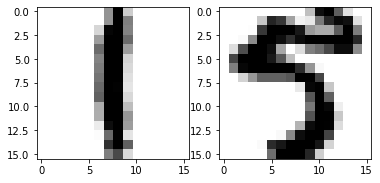

In [2]:
# the indexes (within train_data) of the images to be plotted
image1_no = 100
image2_no = 1100

# define a pyplot figure
f = plt.figure()

f.add_subplot(1, 2, 1)
plt.imshow(train_data[image1_no], "gray_r") # draw the first image

f.add_subplot(1, 2, 2)
plt.imshow(train_data[image2_no], "gray_r") # draw the second image

plt.show(block=True) # show the images on the screen


**(10 points) Implementing Representation 1:** Extract the **symmetry** and **average intensity** features discussed in the class (see logistic regression lecture notes). To compute the intensity features, compute the average pixel value of the image, and for the symmetry feature, compute the negative of the norm of the difference between the image and its y-axis symmetrical. Search numpy's documentation to find the suitable function at each step. You should extract these two features for each image in the training and test sets. As a result, you should obtain a training data matrix of size 1561x2 and test data matrix of size 424x2.

Throughout the notebook, we will refer the representation with these two features as **Representation 1** 

In [3]:
#Compute average of each image and store them in 1-D array
train_avg = np.zeros(1561)
test_avg = np.zeros(424)

for i in range(1561):
    train_avg[i] = train_data[i].mean()
    
for i in range(424):
    test_avg[i] = test_data[i].mean()

#Compute symmetry of each image and store them in 1-D array
train_symmetry = np.zeros(1561)
test_symmetry = np.zeros(424)

for i in range(1561):
    A = train_data[i]
    train_symmetry[i] =  -LA.norm(A-np.flip(A,1))
    
for i in range(424):
    A = test_data[i]
    test_symmetry[i] =  -LA.norm(A-np.flip(A,1))

**(5 points)** Provide two scatter plots, one for training and one for test data. The plots should contain the average intensity values in the x-axis and symmetry values in the
y-axis. Denote the data points of label 1 with blue marker shaped <font color='blue'>o</font> and the data points of label -1 with a red marker shaped <font color='red'>x</font>. (Hint: check out `plt.scatter` and its `marker` and `color` parameters). Explicitly state the axis labels and figure title for both plots (Hint: `plt.xlabel`, `plt.ylabel`, `plt.title`). 

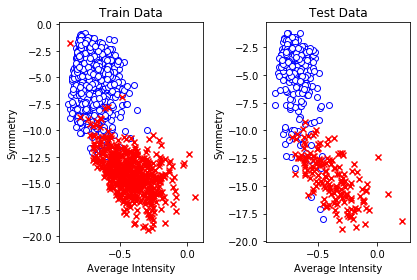

In [4]:
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.scatter(train_avg[np.where(train_labels==1)],train_symmetry[np.where(train_labels==1)],c='w',edgecolor='b')
plt.scatter(train_avg[np.where(train_labels==-1)],train_symmetry[np.where(train_labels==-1)],c='r',marker='x')
plt.xlabel("Average Intensity")
plt.ylabel("Symmetry")
plt.title("Train Data")

f.add_subplot(1, 2, 2)
plt.scatter(test_avg[np.where(test_labels==1)],test_symmetry[np.where(test_labels==1)],c='w',edgecolor='b')
plt.scatter(test_avg[np.where(test_labels==-1)],test_symmetry[np.where(test_labels==-1)],c='r',marker='x')
plt.xlabel("Average Intensity")
plt.ylabel("Symmetry")
plt.title("Test Data")

plt.tight_layout()


-1


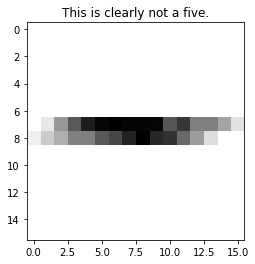

In [5]:
#Examine the outlier
np.amin(train_avg[np.where(train_labels==-1)])
np.where(train_avg==-0.86390234375)
plt.imshow(train_data[1517], "gray_r")
plt.title("This is clearly not a five.")
print(train_labels[1517])

**(15 points) Implementing Representation 2:** Come up with an alternative feature extraction approach. The features can again be 2-D, or higher dimensional. If you use any external resource, please cite the references. Explain the feature extraction procedure clearly in your report; if it is an algorithm, provide the algorithm; if it is a function, provide the mathematical expressions. 

If your proposed features are 2-D or 3-D, provide the scatter plots similar to the previous step.

We will refer this representation proposed by you as **Representation 2**.

In [6]:
train_hor = np.zeros(1561)
test_hor = np.zeros(424)
train_ver = np.zeros(1561)
test_ver = np.zeros(424)
train_change = np.zeros(1561)
test_change = np.zeros(424)
train_nonw = np.zeros(1561)
test_nonw = np.zeros(424)

#length of longest horizontal line of nonwhite cells
def longest_horizontal(A):
    max_length =0
    length = 0
    counting = False
    #Check every row
    for i in range(A.shape[0]):
        length=0
        #Iterate in the row
        for j in range(A.shape[0]):
            #If you see a nonwhite start counting
            if (counting == False and A[i][j]>-0.8):
                counting = True
            #If you had already started, count
            elif (A[i][j]>-0.8):
                length +=1
                #If this was the max length, record
                if max_length<length:
                    max_length=length
            else:
                length = 0
                counting =False
    return max_length

#length of longest vertical line of nonwhite cells
def longest_vertical(A):
    max_length =0
    length = 0
    counting = False
    #Check every column
    for i in range(A.shape[0]):
        length=0
        #Iterate in the column
        for j in range(A.shape[0]):
            #If you see a nonwhite start counting
            if (counting == False and A[j][i]>-0.8):
                counting = True
            #If you had already started, count
            elif (A[i][j]>-0.8):
                length +=1
                #If this was the max length, record
                if max_length<length:
                    max_length=length
            else:
                length = 0
                counting =False
    return max_length

#maximum number of color changes in any column
def vertical_change(A):
    max_change =0
    #Check every column
    for i in range(A.shape[0]):
        change=0
        wasWhite=True
        #Iterate in the column
        for j in range(A.shape[0]):
            #If you see a nonwhite and last color was white
            if (wasWhite and A[j][i]>-0.8):
                wasWhite = False
                change +=1
            #If you see a white and last color was nonwhite
            elif (wasWhite==False and A[j][i]<-0.8):
                wasWhite = True
                change +=1
        #If this column has the max change
        if max_change<change:
            max_change= change
            
    return max_change
            
def nonwhite(A):
    c=0
    for i in range(16):
        for j in range(16):
            if(A[i][j]==-1):
                c+=1
    return c

for i in range(1561):
    train_hor[i] = longest_horizontal(train_data[i])
    train_ver[i] = longest_vertical(train_data[i])
    train_change[i] = vertical_change(train_data[i])
    train_nonw[i] = nonwhite(train_data[i])
    
for i in range(424):
    test_hor[i] = longest_horizontal(test_data[i])
    test_ver[i] = longest_vertical(test_data[i])
    test_change[i] = vertical_change(test_data[i])
    test_nonw[i] = nonwhite(test_data[i])



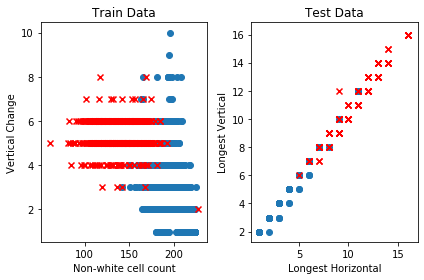

In [7]:
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.scatter(train_nonw[np.where(train_labels==1)],train_change[np.where(train_labels==1)])
plt.scatter(train_nonw[np.where(train_labels==-1)],train_change[np.where(train_labels==-1)],c='r',marker='x')
plt.xlabel("Non-white cell count")
plt.ylabel("Vertical Change")
plt.title("Train Data")

f.add_subplot(1, 2, 2)
plt.scatter(test_hor[np.where(test_labels==1)],test_ver[np.where(test_labels==1)])
plt.scatter(test_hor[np.where(test_labels==-1)],test_ver[np.where(test_labels==-1)],c='r',marker='x')

plt.xlabel("Longest Horizontal")
plt.ylabel("Longest Vertical")
plt.title("Test Data")

plt.tight_layout()
#Our representation uses more than 3 features but to add some visualization we provided 2 scatter
#plots with different features.

## Task 2: Logistic Regression (40 Pts)

**(20 points)** Implement the logistic regression classifier from scratch with gradient descent and train it using Representation 1 and Representation 2 as inputs. Concatenate
1 to your features for the intercept term, such that one data point will look like for 2-D features [1,$x_1$,$x_2$], and the model vector will be [$w_0, w_1, w_2$], where $w_0$ is the intercept parameter. 
You can refer to lecture notes (Logistic regression slides 29-30) to review the gradient descent learning algorithm and the logistic loss. To implement the gradient of the logistic loss with respect to $w$, first derive its expression by hand. Please include your derivation in your report.

To prove that your implementation is converging, keep the loss values at each gradient descent iteration in a numpy array. After the training is finalized, plot the loss values
with respect to iteration count (Hint: `plt.plot`). You should observe a decreasing loss as the number of iterations increases. Also, experiment with 5 different learning rates between 0 and 1, and plot the convergence curves for each learning rate in the same plot to observe the effect of the learning rate (step size) on the convergence. 

To decide when to terminate the gradient descent iterations, check the absolute difference between the current loss value and the loss value of the previous step. If the difference is less than a small number, such as $10^{-5}$, you can exit the loop.

In [8]:
### HELPER FUNCTIONS ###

def calculate_logistic_loss(Y, W, X, reg_parameter):
    """
        calculates the logistic loss value
    """
    return np.sum(np.log(1 + np.exp((-1) * (np.dot(W.T, X) * Y.T)))) + np.dot(reg_parameter / 2, np.dot(W.T, W))

def shift_w(w, step_size, dir_v):
    """
        shifts w in the direction dir_v
    """
    return w + np.dot(step_size, dir_v)

def sigmoid(s):
    """
        the sigmoid function
    """
    return 1/(1 + np.exp(-s))

    
def find_direction(X, Y, W, N, reg_parameter):
    """
        finds the most suitable direction to shift the weights vector
    """
    part0 = (X * Y.T)
    part1 = np.exp((-1) * (np.dot(W.T,X) * Y.T))
    nominator = (part0 * part1.T)
    loss_func_derivative = nominator / (part1 + 1)
    direction = (np.sum(loss_func_derivative, axis = 1) / N) + np.dot(reg_parameter, W)
    direction = direction / np.sqrt(direction.dot(direction))
    return direction

def gradient_descent(X, Y, N, learning_rate, reg_parameter, max_iterations = 0):
    """
        the gradient descent algorithm
        
        X : Input matrix
        Y : Output matrix
        N : Input length
        learning_rate : Step size
        max_iterations : A limit to iteration count, 0 is unlimited. This may be necessary to prevent overflow.
    """
    
    W = np.zeros(len(X))  # initialize a weights vector, the same length as the number of attributes
    loss_array = []  # an array to hold the loss values over iterations
    
    i = 0  # iteration counter
    
    while True:
        i += 1
        
        # find the most suitable direction to shift the weights vector
        dir_v = find_direction(X,Y,W,N,reg_parameter)
        
        # shift the weights vector in that direction
        W = shift_w(W, learning_rate, dir_v)
        
        # calculate the new logistic loss value and append it to loss_array
        loss_array.append(calculate_logistic_loss(Y, W, X,reg_parameter))
        
        # if the absolute difference between the last 2 loss values is less than 10**(-5), break
        if len(loss_array) > 2 and np.abs(loss_array[-1] - loss_array[-2]) < 10**(-5):
            break
        
        # if the max_iterations parameter is not 0, and we have exceeded that number, break
        if max_iterations != 0 and i > max_iterations:
            break
        
    return loss_array, W

def error_check(train_X, test_X, train_Y, test_Y, W):
    
    lb_1 = 0  # counter for the falsely identified 1's
    lb_2 = 0  # counter for the falsely identified 5's
    
    probs = sigmoid(np.dot(W, train_X))
    
    for i in range(len(probs)):
        if probs[i] > 0.5 and train_Y[i] != 1:
            lb_1 += 1
        elif probs[i] <= 0.5 and train_Y[i] != -1:
            lb_2 += 1
    
    #print("Results for the training data:")
    #print("Number of 5's identified as 1's =", lb_1)
    #print("Number of 1's identified as 5's =", lb_2)
    
    errors = [[lb_1, lb_2]]
    
    # test with the test data

    probs = sigmoid(np.dot(W, test_X))
    
    lb_1 = 0  # reset counters
    lb_2 = 0
    
    for i in range(len(probs)):
        if probs[i]>0.5 and test_Y[i]!=1:
            lb_1+=1
        elif probs[i]<=0.5 and test_Y[i]!=-1:
            lb_2+=1
    
    #print("\nResults for the test data:")
    #print("Number of 5's identified as 1's =", lb_1)
    #print("Number of 1's identified as 5's =", lb_2)
    
    errors.append([lb_1, lb_2])
    
    return errors

In [9]:
### EXPERIMENT WITH DIFFERENT LEARNING RATES ###

N = len(train_avg)
test_N = len(test_avg)

# Representation 1
X = np.array([np.ones(N), train_avg, train_symmetry])

# Representation 2
X_2 = np.array([np.ones(N), train_avg, train_symmetry, train_hor, train_ver, train_change, train_nonw])

Y = train_labels
test_Y = test_labels

test_X = np.array([np.ones(len(test_labels)), test_avg, test_symmetry])
test_X_2 = np.array([np.ones(len(test_labels)), test_avg, test_symmetry, test_hor, test_ver, test_change, test_nonw])


Text(0.5, 1.0, 'A higher learning rate results in a quicker decrease')

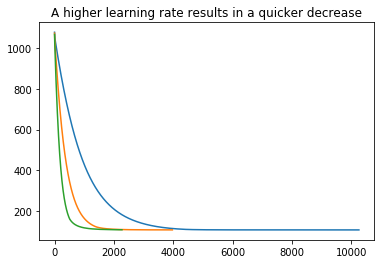

In [10]:
# Plot the loss values for 3 different learning rates and see that they are decreasing

learning_rate = 0.002
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=0)
plt.plot(lossArray)

learning_rate = 0.005
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=0)
plt.plot(lossArray)

learning_rate = 0.01
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=0)
plt.plot(lossArray)

plt.title("A higher learning rate results in a quicker decrease")


Text(0.5, 1.0, 'Setting the learning rate too high (red and purple lines)')

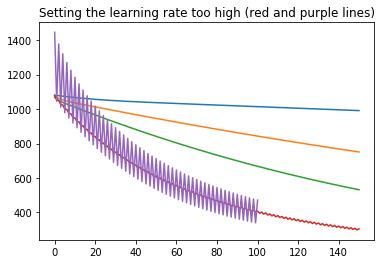

In [11]:

# Plot the loss values at the first 100-150 iterations (so that it is more clear) for the following learning rates

learning_rate = 0.001
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=150)
plt.plot(lossArray)

learning_rate = 0.005
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=150)
plt.plot(lossArray)

learning_rate = 0.01
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=150)
plt.plot(lossArray)

learning_rate = 0.1
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=150)
plt.plot(lossArray)

learning_rate = 0.25
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=100)
plt.plot(lossArray)

plt.title("Setting the learning rate too high (red and purple lines)")


Text(0.5, 1.0, 'A learning rate of 0.03 is still too high')

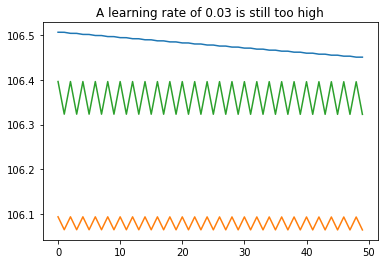

In [12]:
# From the above experiments, we can see that the optimal learning rate is somewhere around 0.01

# Let us zoom in on the last 50 iterations with the following learning rates

learning_rate = 0.01
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=0)
plt.plot(lossArray[-50:])

learning_rate = 0.03
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=10000)
plt.plot(lossArray[-50:])

learning_rate = 0.04
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0, max_iterations=10000)
plt.plot(lossArray[-50:])

plt.title("A learning rate of 0.03 is still too high")

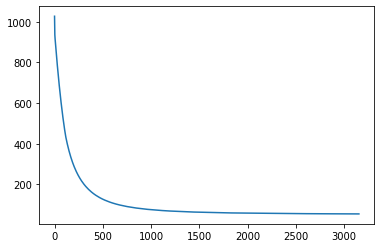

In [13]:
# Let us experiment with the representation 2

learning_rate = 0.001
lossArray, W = gradient_descent(X_2, Y, N, learning_rate, reg_parameter=0, max_iterations=0)
plt.plot(lossArray)

**(10 points)** Implement logistic regression with $\ell_2$ norm regularization, $||\mathbf{w}||_{2}^{2}$ . Show that your implementation is working by visualizing the loss over the iterations again. Visualization for a single learning rate and $\lambda$ suffices. 

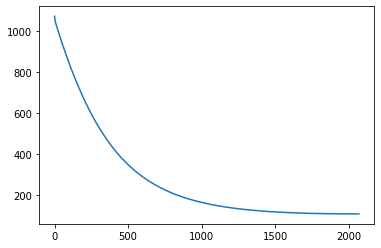

In [14]:
learning_rate = 0.005
lossArray, W = gradient_descent(X, Y, N, learning_rate, reg_parameter=0.01, max_iterations=0)
plt.plot(lossArray)

**(10 points)** Implement a 5-fold cross validation procedure to find the optimal $\lambda$ value for both Representation 1 and 2. Experiment with at least three different $\lambda$ values between 0 and 1. Report the mean/std of cross validation accuracy of every representation/parameter combination as a table and clearly mark the best configuration in your report. 

In [15]:
def k_fold_cross_validation(k, X, Y, learning_rate, reg_parameter):
    
    N = len(Y)
    part_N = int(np.floor(N / k))
    
    k_parts_X = []
    k_parts_Y = []
    
    # divide the X and Y matrices into k parts and fill into k_parts_X/Y arrays
    for i in range(k):
        
        start_index = i * part_N
        end_index = start_index + part_N
        
        part_X = [[] for a in range(len(X))]
        
        for j in range(len(X)):
            part_X[j] = X[j][start_index:end_index]
        
        part_Y = Y[start_index:end_index]
        
        k_parts_X.append(part_X)
        k_parts_Y.append(part_Y)
        
    errors = []  # this list will hold the number of errors in each validation
    
    
    for i in range(k):
        
        # use i'th part as the validation set
        validation_X = k_parts_X[i]
        validation_Y = k_parts_Y[i]
        
        # concatenate the remaining parts and use them as the training set
        training_X = [[] for a in range(len(X))]
        training_Y = []

        for j in range(k):
            if i == j:
                continue
            
            for l in range(len(X)):
                training_X[l].extend(k_parts_X[j][l])
                
            training_Y.extend(k_parts_Y[j])
        
        validation_X = np.asarray(validation_X)
        validation_Y = np.asarray(validation_Y)
        training_X = np.asarray(training_X)
        training_Y = np.asarray(training_Y)

        loss_array, W = gradient_descent(training_X, training_Y, part_N, learning_rate, reg_parameter)
        errors.append(error_check(training_X, validation_X, training_Y, validation_Y, W))
        
    print(errors)

# 5-fold cross validation with representation 1
k_fold_cross_validation(5,X,Y,0.001,0.2)
k_fold_cross_validation(5,X,Y,0.001,0.15)
k_fold_cross_validation(5,X,Y,0.001,0.1)

# 5-fold cross validation with representation 2
k_fold_cross_validation(5,X_2,Y,0.0001,0.2)
k_fold_cross_validation(5,X_2,Y,0.0001,0.15)
k_fold_cross_validation(5,X_2,Y,0.0001,0.1)

[[[14, 16], [0, 9]], [[14, 17], [0, 7]], [[14, 18], [0, 6]], [[14, 14], [7, 2]], [[13, 14], [14, 0]]]
[[[14, 16], [0, 9]], [[14, 17], [0, 7]], [[15, 18], [0, 6]], [[14, 14], [7, 2]], [[14, 14], [14, 0]]]
[[[14, 16], [0, 9]], [[14, 17], [0, 7]], [[15, 18], [0, 6]], [[14, 14], [7, 2]], [[14, 14], [14, 0]]]
[[[7, 4], [0, 2]], [[7, 5], [0, 1]], [[7, 4], [0, 2]], [[8, 5], [3, 1]], [[4, 5], [10, 0]]]
[[[6, 4], [0, 2]], [[7, 5], [0, 1]], [[7, 4], [0, 2]], [[8, 5], [3, 1]], [[4, 5], [9, 0]]]
[[[6, 4], [0, 2]], [[6, 5], [0, 1]], [[6, 4], [0, 2]], [[8, 5], [3, 1]], [[5, 5], [9, 0]]]


## Task 3: Evaluation (25 Pts)

**(5 points)** Train the logistic regression classifier on Representation 1 and 2 with the best learning rate you decide. Similarly, train the regularized logistic regression classifier with the best $\lambda$ you obtained by 5-fold cross validation. Report the training and test classification accuracy as 
\begin{align*}
\frac{\text{number of correctly classified samples}}{\text{total number of samples}}x100
\end{align*}

In [16]:
best_learning_rate_1 = 0.001
best_learning_rate_2 = 0.0001

best_reg_parameter_1 = 0.2
best_reg_parameter_2 = 0.15

loss_array_1, W_1 = gradient_descent(X, Y, N, best_learning_rate_1, best_reg_parameter_1)
error_1 = error_check(X, test_X, Y, test_Y, W_1)

loss_array_2, W_2 = gradient_descent(X_2, Y, N, best_learning_rate_2, best_reg_parameter_2)
error_2 = error_check(X_2, test_X_2, Y, test_Y, W_2)

In [17]:
# Training classification accuracy
print("Total number of errors (representation 1, training) :", error_1[0][0] + error_1[0][1])
print("Total number of errors (representation 2, training) :", error_2[0][0] + error_2[0][1])
print("Total number of samples (training) :", N)
print()

# Test classification accuracy
print("Total number of errors (representation 1, test) :", error_1[1][0] + error_1[1][1])
print("Total number of errors (representation 2, test) :", error_2[1][0] + error_2[1][1])
print("Total number of samples (test) :", test_N)


Total number of errors (representation 1, training) : 37
Total number of errors (representation 2, training) : 13
Total number of samples (training) : 1561

Total number of errors (representation 1, test) : 20
Total number of errors (representation 2, test) : 12
Total number of samples (test) : 424


**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

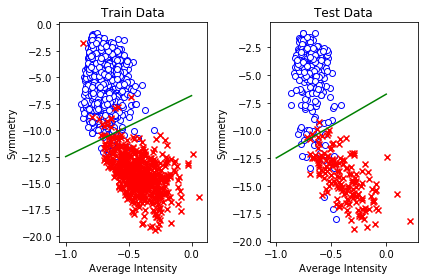

In [18]:
# Let us calculate some points on the decision boundary
y = []
r = np.linspace(-1,0,11) # we will calculate 11 points between -1 and 0 (for x values)

for i in r:
    x = i
    y_val = -(W_1[1]/W_1[2]) * x -(W_1[0]/W_1[2])
    y.append(y_val)

# Plot o's and x's to represent samples, as we have before
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.scatter(train_avg[np.where(train_labels==1)],train_symmetry[np.where(train_labels==1)],c='w',edgecolor='b')
plt.scatter(train_avg[np.where(train_labels==-1)],train_symmetry[np.where(train_labels==-1)],c='r',marker='x')

# Plot the decision boundary
plt.plot(r, y, c='g')

plt.xlabel("Average Intensity")
plt.ylabel("Symmetry")
plt.title("Train Data")

# Again for test data
f.add_subplot(1, 2, 2)
plt.scatter(test_avg[np.where(test_labels==1)],test_symmetry[np.where(test_labels==1)],c='w',edgecolor='b')
plt.scatter(test_avg[np.where(test_labels==-1)],test_symmetry[np.where(test_labels==-1)],c='r',marker='x')

# Plot the decision boundary
plt.plot(r, y, c='g')

plt.xlabel("Average Intensity")
plt.ylabel("Symmetry")
plt.title("Test Data")

plt.tight_layout()

**(5 points)** Comment on your work in your report. Include the answers for the following questions in your discussion. 

* Did regularization improve the generalization performance (did it help reducing the gap between training and test accuracies/errors)? Did you observe any difference between using Representation 1 and 2?
* Which feature set did give the best results? Which one is more discriminative?
* What would be your next step to improve test accuracy? 